In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing file from url.
url = 'https://raw.githubusercontent.com/Raghavagr/Laptop_Price_Prediction/main/laptop_data.csv'
res = requests.get(url, allow_redirects=True)
with open('laptop.csv','wb') as file:
    file.write(res.content)
data= pd.read_csv('laptop.csv')

In [2]:
data.tail(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1293,1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1294,1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1295,1295,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1296,1296,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1297,1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200


In [3]:
data.shape


(1303, 12)

In [4]:
#checking for null values.
data.isnull().sum()
#we don't have null values.

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
#opping unnecessary data.
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
#removing unitr return after ram,weight and converting them to numeric value.
data['Ram']=data['Ram'].str.replace("GB","")
data['Weight']=data['Weight'].str.replace("kg","")
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')

In [7]:

data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [8]:

#Data Preprocessing.
#We are creating touchscreen column which is a binary attribute one means touchscreen 0 no toucscreen. 
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#extract IPS column
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
#We will split resoluttion in x and y by first spllitting by space the spllitting by cross symbol
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')
data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [9]:
#Now we can see in the coorelation that Incehes is not correlated much while X_res ,Y_res is correlated much so we commmine them into ne column.
#WE will convert them to Pixel per inches(PPI) using standard formula.
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [10]:
#Now we can see in the coorelation that Incehes is not correlated much while X_res ,Y_res is correlated much so we commmine them into ne column.
#WE will convert them to Pixel per inches(PPI) using standard formula.
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [11]:
data.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)


In [12]:
#now we can see cpu column also contain many different values so will also split it.
def fetch_processor(x):
    cpu_name="".join(x.split()[0:3])
    if cpu_name=='Intel Core i7 'or cpu_name=='Intel Core i3'or cpu_name=='Intel Core i5':
        return cpu_name
    elif cpu_name.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
data['cpu_brand']=data['Cpu'].apply(lambda x:fetch_processor(x))

In [13]:
# Which brand GPU is in laptop
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
data = data[data['Gpu_brand'] != 'ARM']
data.drop(columns=['Gpu'],inplace=True)

In [15]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

In [16]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,Gpu_brand,os
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,1.37,71378.6832,0,1,226.983005,AMD Processor,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,AMD Processor,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,1.86,30636.0000,0,0,141.211998,AMD Processor,Intel,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,1.83,135195.3360,0,1,220.534624,AMD Processor,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,1.37,96095.8080,0,1,226.983005,AMD Processor,Intel,Mac


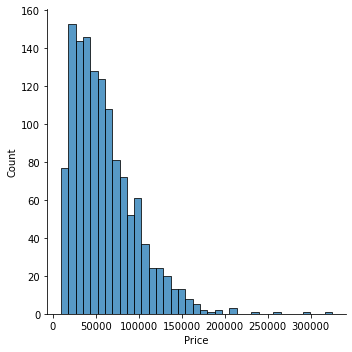

In [17]:
#We will now see distribution of our target column that is price.
sns.displot(data['Price'])
plt.show()
#the disrtibution is skewed towards left showing that more laptops at lower price because lower price laptop are sold and purchased more.



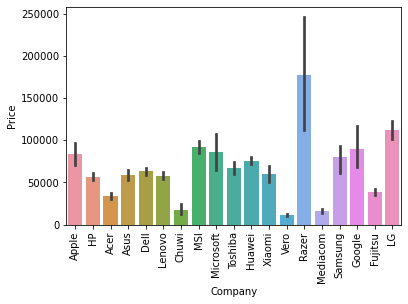

In [18]:
#A bar plat to check whether brand name affect price of laptop.
sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation="vertical")

plt.show()
#we can se from the plot that Razer, Apple, LG, Microsoft, Google, MSI laptops are expensive, and others are in the budget range.

<AxesSubplot:>

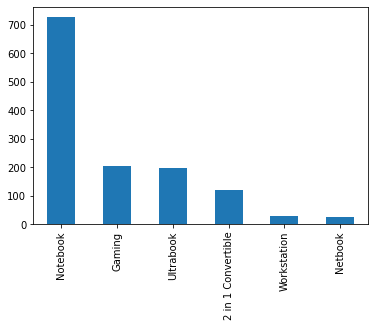

In [19]:
data['TypeName'].value_counts().plot(kind='bar')

In [20]:
#checking corelation between various attributes.
data.corr()
data[data.columns[1:]].corr()['Price'][:]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
Name: Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x212646f96d0>,
 'caps': [<matplotlib.lines.Line2D at 0x212646f9d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x212646f9310>],
 'medians': [<matplotlib.lines.Line2D at 0x212647054c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21264705850>],
 'means': []}

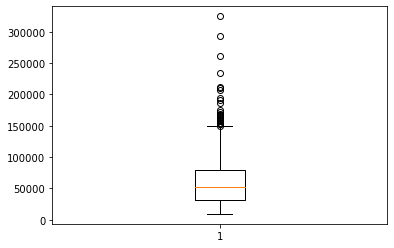

In [21]:
#We can se few laptop price is exceedling high so they are shown as outlier in box plot this is very common a s some expensive laptops are there prsent
plt.boxplot(data['Price'])

C:\Users\sawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


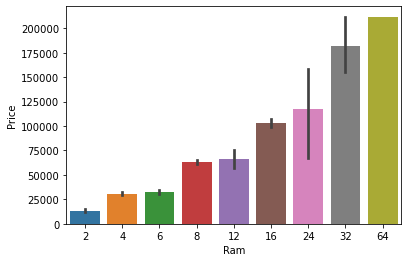

In [22]:
#As price is having very strong corelation with ram we will plot it
sns.barplot(data['Ram'], data['Price'])
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [24]:
le={}
for col in set(data.columns).difference({'Price'}):
    le[col] = LabelEncoder()
    data[col]  = le[col].fit_transform(data[col])
data

,Company,TypeName,Cpu,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,Gpu_brand,os
0,1,4,65,3,4,37,71378.6832,0,1,29,0,1,0
1,1,4,63,3,2,34,47895.5232,0,0,10,0,1,0
2,7,3,74,3,16,72,30636.0000,0,0,12,0,1,1
3,1,4,85,5,29,69,135195.3360,0,1,25,0,0,0
4,1,4,67,3,16,37,96095.8080,0,1,29,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,89,1,4,68,33992.6400,1,1,14,0,1,2
1299,10,0,89,5,29,31,79866.7200,1,1,34,0,1,2
1300,10,3,34,0,35,49,12201.1200,0,0,5,0,1,2
1301,7,3,89,2,10,100,40705.9200,0,0,1,0,0,2


In [25]:
def normalize_col(col_name):
      return (data[col_name] -data[col_name].min())/(data[col_name].max()-data[col_name].min())
for col in ['Price']:
     data[col]=normalize_col(col)
data

,Company,TypeName,Cpu,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,Gpu_brand,os
0,1,4,65,3,4,37,0.196741,0,1,29,0,1,0
1,1,4,63,3,2,34,0.122353,0,0,10,0,1,0
2,7,3,74,3,16,72,0.067679,0,0,12,0,1,1
3,1,4,85,5,29,69,0.398895,0,1,25,0,0,0
4,1,4,67,3,16,37,0.275038,0,1,29,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,89,1,4,68,0.078312,1,1,14,0,1,2
1299,10,0,89,5,29,31,0.223629,1,1,34,0,1,2
1300,10,3,34,0,35,49,0.009283,0,0,5,0,1,2
1301,7,3,89,2,10,100,0.099578,0,0,1,0,0,2


In [26]:
#x=df.drop('Price_euros',axis=1)
#y=df.Price_euros
x = data.drop(columns=['Price'])
y =  data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [39]:
x_test.tail(10)

,Company,TypeName,Cpu,Ram,Memory,Weight,Touchscreen,Ips,ppi,cpu_brand,Gpu_brand,os
935,7,2,68,3,16,27,0,0,19,0,1,2
11,7,3,56,1,26,72,0,0,12,0,1,1
835,4,1,102,5,18,146,0,0,12,0,2,2
332,2,3,97,3,18,84,0,0,14,0,1,2
963,16,4,97,3,29,10,1,0,19,0,1,2
553,7,3,56,3,10,128,0,0,2,0,1,2
1251,7,3,8,1,26,72,0,0,1,0,0,2
54,0,3,59,1,10,117,0,0,1,0,1,2
663,7,3,56,2,10,87,0,0,12,0,0,2
233,4,3,74,3,16,55,0,0,14,0,1,2


In [ ]:
pip install sckit learn

In [27]:
#training our model o n SVm
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
models2=regressor.fit(x_train, y_train)

R2 score 0.610653311893592
MAE 0.05827611660340891


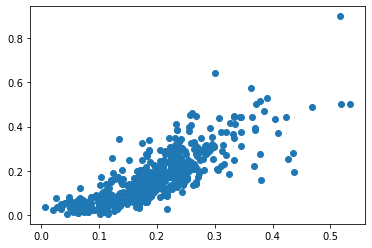

In [38]:
#Evaluating our SVM Model
y1pred=models2.predict(x_test)
plt.scatter(ypred,y_test)

print('R2 score',r2_score(y_test,y1pred))

print('MAE',mean_absolute_error(y_test,y1pred))

In [29]:
numerical_cols=data.select_dtypes(exclude=['object']).columns
data1=data[numerical_cols]
data1.head(2)

,Company,TypeName,Cpu,Ram,Memory,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,Gpu_brand,os
0,1,4,65,3,4,37,0.196741,0,1,29,0,1,0
1,1,4,63,3,2,34,0.122353,0,0,10,0,1,0


In [30]:
#Applying linear  regression on numerical data.
x2= data1.drop(columns=['Price'])

y2 = data1['Price']
x2train,x2test,y2train,y2test = train_test_split(x2,y2,test_size=0.15,random_state=2)

In [31]:
x2 .head()

,Company,TypeName,Cpu,Ram,Memory,Weight,Touchscreen,Ips,ppi,cpu_brand,Gpu_brand,os
0,1,4,65,3,4,37,0,1,29,0,1,0
1,1,4,63,3,2,34,0,0,10,0,1,0
2,7,3,74,3,16,72,0,0,12,0,1,1
3,1,4,85,5,29,69,0,1,25,0,0,0
4,1,4,67,3,16,37,0,1,29,0,1,0


In [32]:
lg=LinearRegression()
model=lg.fit(x2train,y2train)
y2pred=model.predict(x2test)

In [33]:
model.score(x2test,y2test)

0.6573348144299724

R2 score 0.6573348144299724
MAE 0.046044067856167006


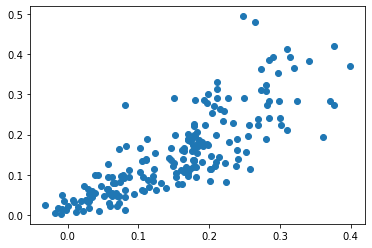

In [34]:
#Evaluation of linaer regression
from sklearn.metrics import r2_score
print('R2 score',r2_score(y2test,y2pred))
print('MAE',mean_absolute_error(y2test,y2pred))
plt.scatter(y2pred,y2test)

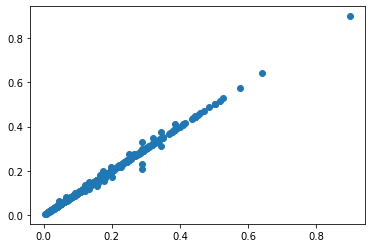

In [35]:
#Aplying DecisiontreeRegressor
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor(random_state = 45)
decision.fit(x,y)
y3pred=decision.predict(x_test)
plt.scatter(y3pred,y_test)

In [37]:
#Evaluatiing decision tree regressor.
print('R2 score',r2_score(y_test,y3pred))

print('MAE',mean_absolute_error(y_test,y3pred))

R2 score 0.9969123656945321
MAE 0.0014372803572055256


In [61]:
decision.predict(x_test.tail(1))

array([0.11561181])

In [62]:
#As we can our oredicted and actual price is very similar hence decision tree regression is best for our dataset.
data.iloc[233,:]

Company         4.000000
TypeName        3.000000
Cpu            74.000000
Ram             3.000000
Memory         16.000000
Weight         55.000000
Price           0.115612
Touchscreen     0.000000
Ips             0.000000
ppi            14.000000
cpu_brand       0.000000
Gpu_brand       1.000000
os              2.000000
Name: 233, dtype: float64